# Outlier - Example

In [1]:
import pandas
import numpy

# Read file

In [5]:
#https://www.fueleconomy.gov/feg/ws/index.shtml#vehicle
df = pandas.read_csv('vehicles_messy.csv', low_memory=False)
df.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [6]:
df[['cylinders','barrels08']].head()

,cylinders,barrels08
0,4.0,15.695714
1,12.0,29.964545
2,4.0,12.207778
3,8.0,29.964545
4,4.0,17.347895


In [7]:
import seaborn as sns

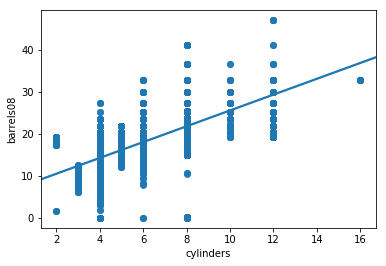

In [8]:
sns.regplot(df['cylinders'], df['barrels08'])

In [49]:
# Let's analyse the correlation between cylinders and barrels
X = df[['cylinders']].sample(5000, random_state=0).fillna(0).copy()
y = df['barrels08'].loc[X.index].copy()

In [10]:
# sns.distplot(y, kde=False)

In [50]:
X.head()

,cylinders
10391,8.0
15339,6.0
10544,4.0
23971,6.0
13178,4.0


In [51]:
y.head()

10391    29.964545
15339    19.109250
10544    14.982273
23971    16.480500
13178    13.733750
Name: barrels08, dtype: float64

# Visualize variables

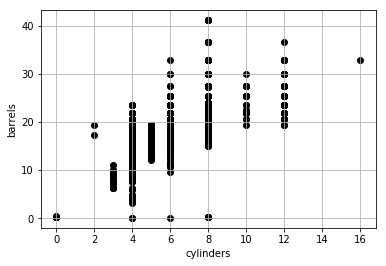

In [56]:
import matplotlib.pyplot as plt

plt.scatter(X, y,  color='k')
plt.xlabel('cylinders')
plt.ylabel('barrels')
plt.grid()
plt.show()

In [171]:
import pandas as pd

In [57]:
# Perform Linear Regression
from sklearn.linear_model import LinearRegression

lr_no_outlier = LinearRegression()
lr_no_outlier.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
lr_no_outlier.coef_

array([1.96618525])

In [59]:
lr_no_outlier.intercept_

6.3619735509490845

barrels08_predicted = intercept +  coef * x 

In [64]:
lr_no_outlier.predict(X)

array([22.09145554, 18.15908504, 14.22671454, ..., 14.22671454,
       22.09145554, 14.22671454])

In [62]:
# Make predictions`
predicted_values_no_outlier = lr_no_outlier.predict(X)

print(f'Barrels08: {lr_no_outlier.intercept_:.2f} + {lr_no_outlier.coef_[0]:.2f} * cylinders')

Barrels08: 6.36 + 1.97 * cylinders


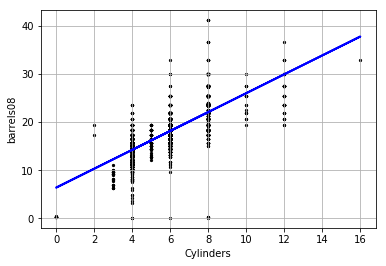

In [69]:
import matplotlib.pyplot as plt

# Plot outputs
plt.scatter(X, y,  color='k', s=5)
plt.plot(X, predicted_values_no_outlier, color='blue', linewidth=2)

plt.xlabel('Cylinders')
plt.ylabel('barrels08')
plt.grid()
plt.show()

# Include Outlier

In [71]:
y.iloc[2] = 2000
y

10391      29.964545
15339      19.109250
10544    2000.000000
23971      16.480500
13178      13.733750
            ...     
23188      11.365862
13360      29.964545
22376      13.184400
37092      23.543571
32485      21.974000
Name: barrels08, Length: 5000, dtype: float64

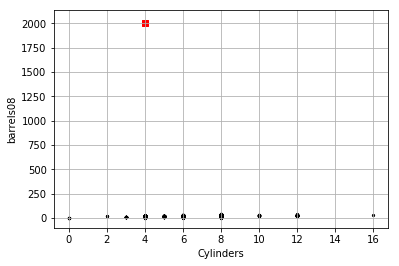

In [74]:
y.iloc[2] = 2000

# Plot variables
plt.scatter(X, y,  color='k', s=5)
plt.scatter(X.iloc[2], y.iloc[2], color='red', marker='s')

plt.xlabel('Cylinders')
plt.ylabel('barrels08')

plt.grid()
plt.show()

In [75]:
# Perform Linear Regression
lr = LinearRegression()
lr.fit(X, y)

# Make predictions
predicted_values_outliers = lr.predict(X)

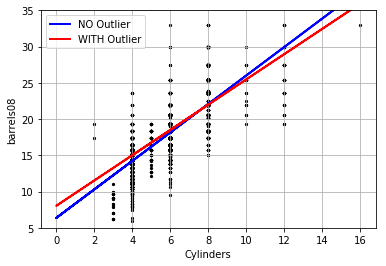

Equação: 6.36 + 1.97 * cylinders
Equação: 8.03 + 1.75 * cylinders


In [77]:
# Plot outputs
plt.scatter(X, y,  color='k', s=5)
plt.scatter(X.iloc[2], y.iloc[2], color='red', marker='s')

plt.plot(X, predicted_values_no_outlier , color='blue', linewidth=2)
plt.plot(X, predicted_values_outliers, color='red', linewidth=2)


plt.xlabel('Cylinders')
plt.ylabel('barrels08')

plt.ylim([5, 35])
plt.grid()
plt.legend(['NO Outlier','WITH Outlier'])
plt.show()

print(f'Equação: {lr_no_outlier.intercept_:.2f} + {lr_no_outlier.coef_[0]:.2f} * cylinders')
print(f'Equação: {lr.intercept_:.2f} + {lr.coef_[0]:.2f} * cylinders')

In [79]:
1 - 1.75 / 1.97

0.1116751269035533